#### 3) No exemplo de sala de aula da classificação binária, implemente a visualização do espaço das features, como na figura 10.11 (direita) reproduzida a seguir.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def p2d(w,P): # w[0] + w[1] * x1 ** 2 + w[2] * x2**2
    np.random.seed(31)
    X = [np.ones(P), 2*np.random.random_sample(P)-1, 2*np.random.random_sample(P)-1]
    X = np.array(X)
    Y = []
    for i in range(P):
        if w[0] + X[1][i] ** 2 * w[1] + X[2][i] ** 2 * w[2] < 0:
            Y.append(-1)
        else:
            Y.append(1)
    return X,Y

def f(x):
    return x**2

def model(w,x):
    xf = f(x)
    return w[0] + xf[1] * w[1] + xf[2] * w[2]

def nl_soft(w,x,y):
    P = len(x[0,:])
    cost = 0
    for p in range(P):
        c = model(w,x[:,p])
        cost += np.log(1+np.exp(-y[p]*c))
        cost /= P
    return cost

def nl_grad_soft(w,x,y):
    N = len(x[:,0])
    P = len(x[0,:])
    grad = np.zeros(N)
    for p in range(P):
        c = model(w,x[:,p])
        grad += y[p]* np.exp(-y[p]*c) * f(x[:,p]) / (1+np.exp(-y[p]*c))
        grad = -grad/P
    return grad

def grad_desc(w,x,y,alpha,its_max):
    w_h = [w]
    cost1 = nl_soft(w,x,y)
    cost_h = [cost1]
    for k in range(its_max):
        grad = nl_grad_soft(w,x,y)
        w = w - alpha * grad
        cost2 = nl_soft(w,x,y)
        w_h.append(w)
        cost_h.append(cost2)
        if cost2 > cost1:
            w = w + alpha * grad
            alpha = alpha / 10
            cost1 = cost2
    return w_h,cost_h

[-10.09713106  29.12098468 -13.4351202 ]


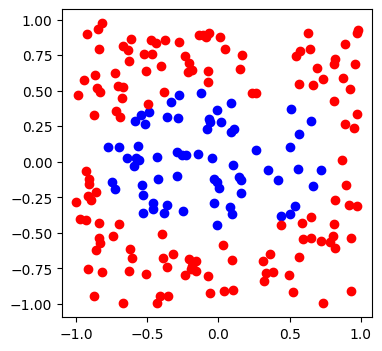

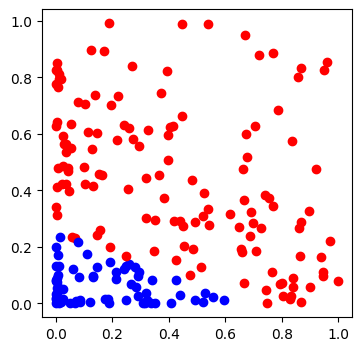

In [23]:
P = 200
w = np.array([1,-1.0/0.64,-1/0.25])
[X,Y] = p2d(w,P)

w = np.array([-3.,32.,-9.])
its = 100
alpha = 1000
[w,cost] = grad_desc(w,X,Y,alpha,its)
last_w = w[-1]

print(last_w)

plt.figure(figsize = (4,4))

for i in range(P):
    if Y[i] > 0:
        plt.scatter(X[1,i],X[2,i],c='b')
    else:
        plt.scatter(X[1,i],X[2,i],c='r')

plt.figure(figsize = (4,4))

for i in range(P):
    if Y[i] > 0:
        plt.scatter(f(X[1,i]), f(X[2,i]),c='b')
    else:
        plt.scatter(f(X[1,i]),f(X[2,i]),c='r')

decision_boundary = [[], []]

plt.plot(decision_boundary[0], decision_boundary[1], c = 'green')
plt.show()